In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:\\Users\\LENOVO\\OneDrive\\Desktop\\data_jobs.csv")
df.job_posted_date = pd.to_datetime(df.job_posted_date)
import ast

df = df[df["job_skills"].notna()]  # Remove NaNs to avoid errors

df["job_skills"] = df["job_skills"].apply(ast.literal_eval)

In [4]:
df_ger = df[(df["job_country"] == "Germany")].dropna(subset=["salary_year_avg"])
job_title = df_ger["job_title_short"].value_counts().index[:5].tolist()
job_title

['Data Scientist',
 'Data Engineer',
 'Data Analyst',
 'Machine Learning Engineer',
 'Senior Data Engineer']

In [5]:
df_ger_top5 = df_ger[df_ger["job_title_short"].isin(job_title)]

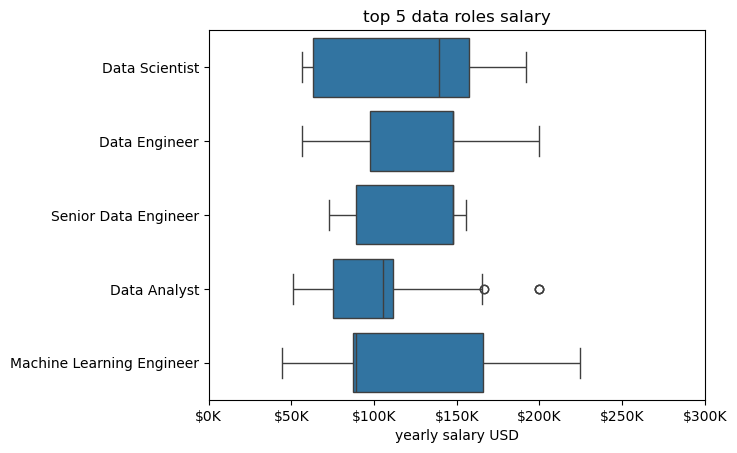

In [13]:
sns.boxplot(data=df_ger_top5, x="salary_year_avg", y="job_title_short", )
plt.title("top 5 data roles salary")
plt.xlabel("yearly salary USD")
plt.ylabel("")
plt.xlim(0, 300000)
ticks_x = plt.FuncFormatter(lambda y, pos:f"${int(y/1000)}K")
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()
